In [63]:
# import zipfile
# with zipfile.ZipFile('Ad-click-data.zip', 'r') as zip_ref:
#     zip_ref.extractall('dataset')
# zip_ref.close()

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Data Description
================================================================
    This data set contains the following features:

    1. VistID: The id for the user visit on website
    2. Time_Spent: Average time spent by user on site in minutes
    3. Age: User age in years
    4. Area_Income: Average Income of geographical area of user
    5. Internet_Usage: Average minutes a day user spent on the internet
    6. Ad_Topic: Headline of the advertisement
    7. Country_Name: Country of user
    8. City_Code: City of user
    9. Male: Whether or not user was male
    10. Time_Period: Time at which consumer clicked on Ad
    11. Weekday: Name of the day
    12. Month: Name of the months
    13. Year: Which year the data is collected
    14. licked: 0 means not clicked and 1 means that user clicked the Ad.

In [3]:

df = pd.read_csv('dataset/Ad click data.csv')

In [4]:
df = df.drop_duplicates()

In [5]:
df.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


Basic data exploration
=====================
    1. balanced dataset
    2. no null values
    3. droped columns are [VistID, Country_Name, Year]
    4. City_code cloumn tell us the Tire of the city in its country. And total 9 city types are available 
    * Time_Spent: continuous
    * Age: continuous
    * Avg_Income : continuous
    * Internet_Usage : continuous
    * Ad_Topic : Categorical
    * City_code	Male :Categorical
    * Time_Period: categorical
    * Weekday: categorical
    * Month : categorical
    * Clicked : categorical (Target variable)
    

In [6]:
df = df.drop(columns=['VistID', 'Country_Name', 'Year'])

In [7]:
df.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6657 entries, 0 to 6656
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time_Spent      6657 non-null   float64
 1   Age             6657 non-null   int64  
 2   Avg_Income      6657 non-null   float64
 3   Internet_Usage  6657 non-null   float64
 4   Ad_Topic        6657 non-null   object 
 5   City_code       6657 non-null   object 
 6   Male            6657 non-null   object 
 7   Time_Period     6657 non-null   object 
 8   Weekday         6657 non-null   object 
 9   Month           6657 non-null   object 
 10  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 624.1+ KB


In [9]:
df.describe()

,Time_Spent,Age,Avg_Income,Internet_Usage,Clicked
count,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000
mean,66.849548,37.258825,55930.486743,184.947684,0.456362
std,15.509672,10.995458,13110.339257,43.189896,0.498129
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,55.200000,28.000000,48454.000000,145.730000,0.000000
50%,70.660000,36.000000,58183.000000,193.580000,0.000000
75%,79.570000,46.000000,65957.000000,222.260000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [10]:
df.nunique()

Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Clicked              2
dtype: int64

<Axes: xlabel='City_code'>

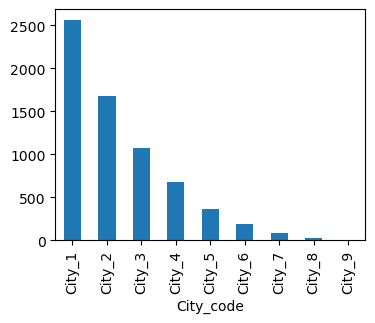

In [11]:
df.groupby('City_code').size().plot(kind='bar', figsize=(4,3))

<Axes: xlabel='Clicked'>

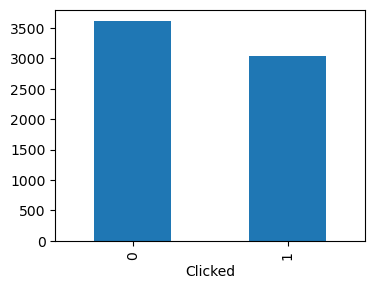

In [12]:
grouped_class = df.groupby('Clicked').size()
grouped_class.plot(kind= 'bar', figsize= (4,3))

<Axes: xlabel='Time_Period'>

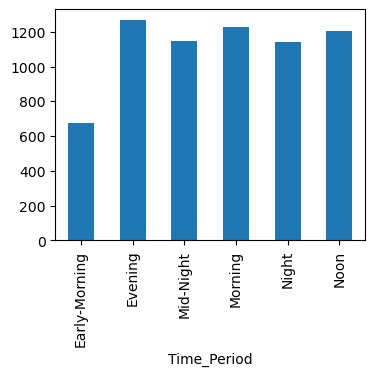

In [13]:
grouped_time_period = df.groupby('Time_Period').size()
grouped_time_period.plot(kind= 'bar', figsize= (4,3))

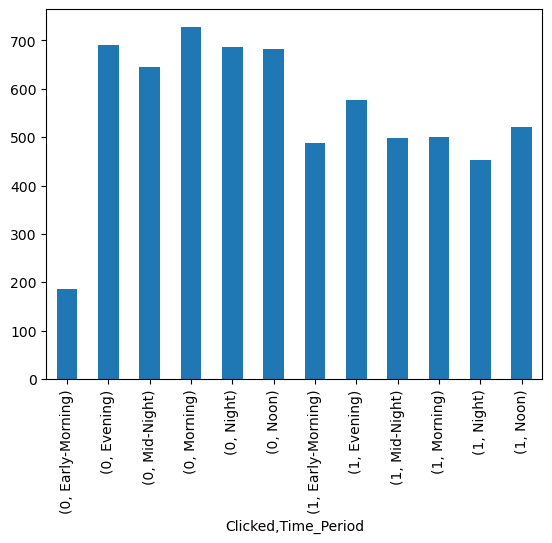

In [14]:
grouped_clicked_Timeperiod = df.groupby(['Clicked', 'Time_Period']).size().plot(kind='bar')

array([[<Axes: title={'center': 'Avg_Income'}>]], dtype=object)

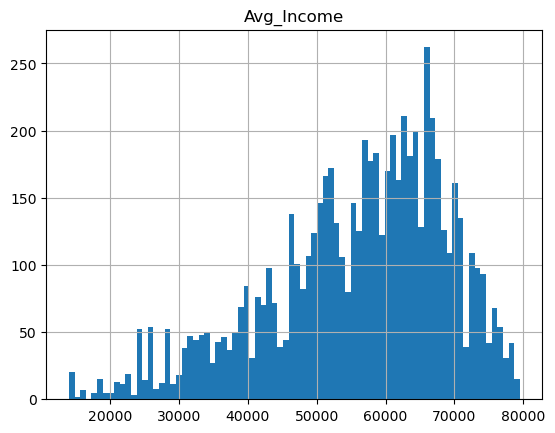

In [15]:
df.hist(column= 'Avg_Income',bins=80)

Visual Exploratory Data Analysis for data distribution
========================================================
    In this data, all the categorical columns have satisfactory distribution for machine learning.

    Selected Categorical Variables: All the categorical variables are selected for further analysis.

    "Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"

    Selected Continuous Variables:

    Time_Spent : Selected.
    Age: Selected.
    Avg_Income: Selected. Slightly negative skewed distribution, acceptable.
    Internet_Usage: Selected.



In [46]:
def plotcategorical(input_data, categorical_columns):
    """
    plot the distribution of the all the categorical variables

    Parameters input_data: dataframe
    parameters categorical_columns: list of column names
    """
    %matplotlib inline
    # generate mutliple subplots    
    fig, subplot = plt.subplots(nrows = 2, ncols = len(categorical_columns)//2, figsize = (30,15))
    fig.suptitle(f"bar plot of categorical {str(categorical_columns)} columns")
    for i, column in zip(range(len(categorical_columns)), categorical_columns):
        count, i = (0, i) if i < len(categorical_columns)//2 else (1 , i-len(categorical_columns)//2)
        input_data.groupby(column).size().plot(kind = 'bar', ax = subplot[count][i])



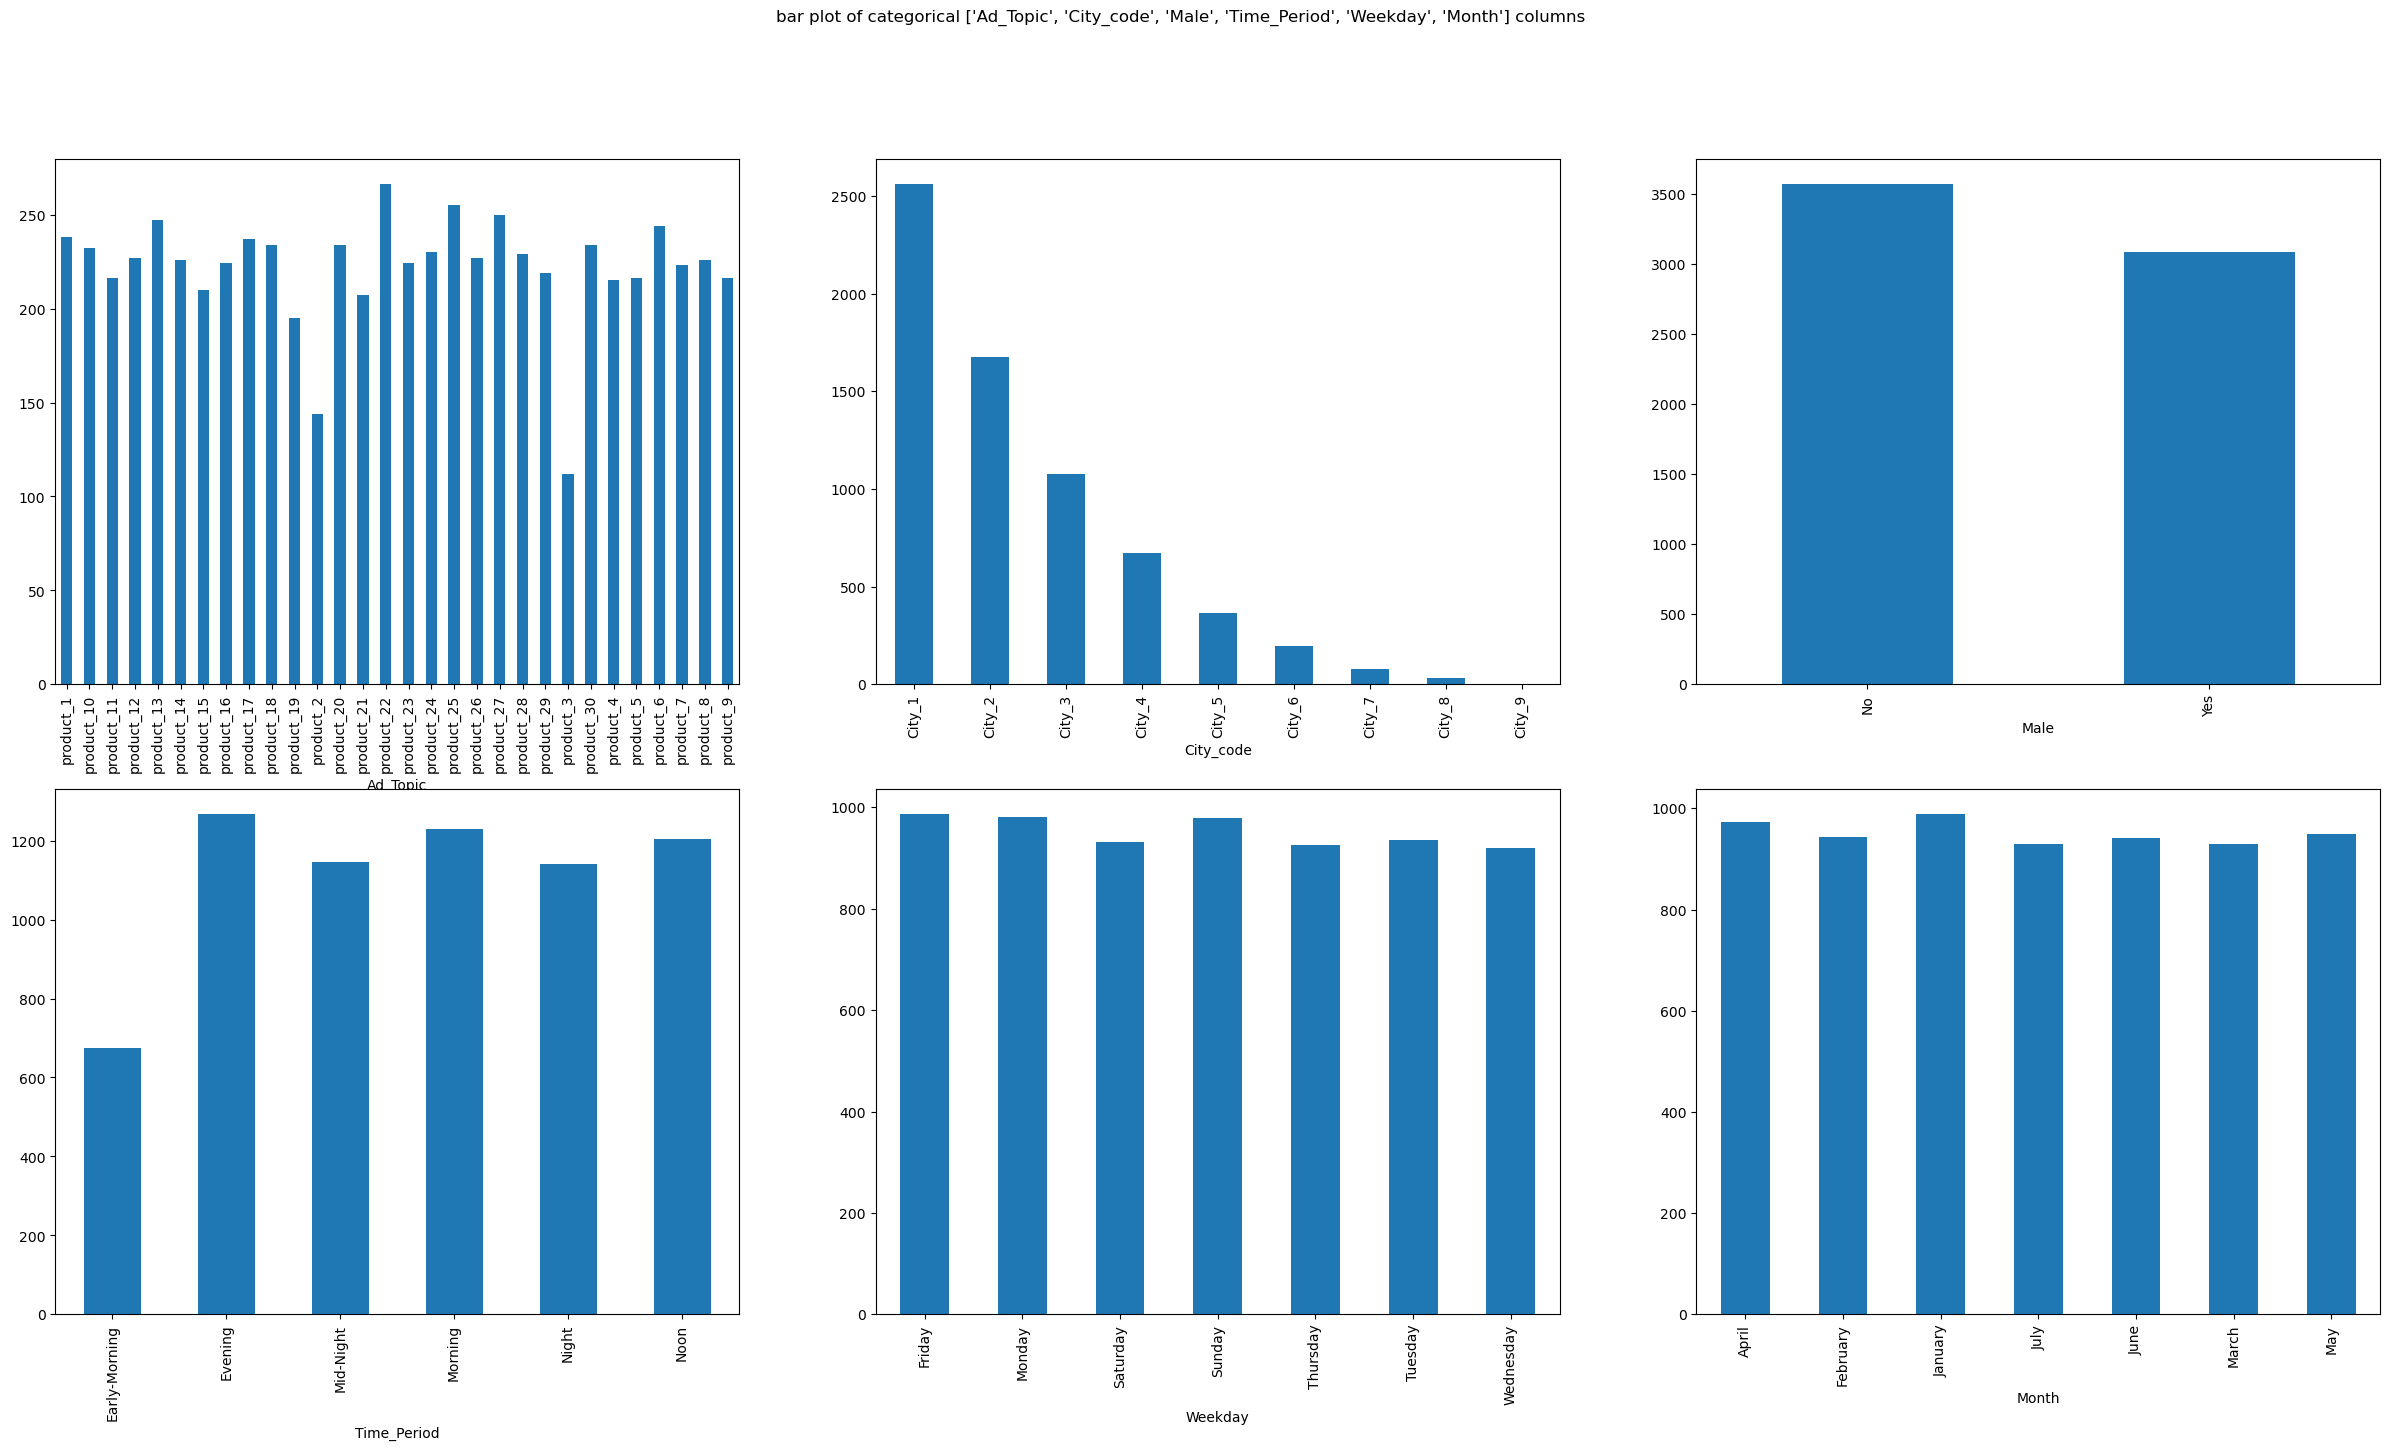

In [49]:
plotcategorical(df, ["Ad_Topic","City_code", "Male",
                     "Time_Period", "Weekday","Month"])

array([[<Axes: title={'center': 'Time_Spent'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Avg_Income'}>,
        <Axes: title={'center': 'Internet_Usage'}>]], dtype=object)

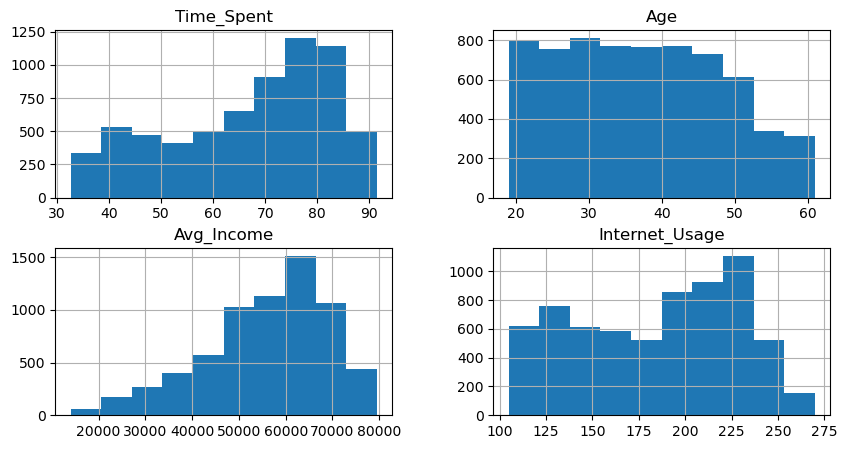

In [50]:
df.hist(["Time_Spent", "Age", "Avg_Income", "Internet_Usage"], figsize=(10,5))

In [52]:
## missing values check out 
df.isnull().sum()

Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Clicked           0
dtype: int64

Feature selection
=================
